# Project Planning Stage (Individual)

In [35]:
# please load the below before proceeding
library(tidyverse)
library(tidymodels)
library(repr)
library(cowplot)
options(repr.matrix.max.rows = 6)

## (1) Data Description

In [36]:
# loading in the given data for the project
# this is the only loaded file as it is the only one relevant to my research question
players <- read_csv("data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [49]:
# please run the code below to see a summary of statistics
summary(players)

mean_table <- players |>
    summarize(
        "Played Hours" = round(mean(played_hours, na.rm = TRUE), 2),
        "Age" = round(mean(Age, na.rm = TRUE), 2)
    ) |>
    pivot_longer(
        cols = everything(),
        names_to = "Variable",
        values_to = "Mean"
    )
mean_table

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

Variable,Mean
<chr>,<dbl>
Played Hours,5.85
Age,21.14


### Data Source
The data was collected by [a research group in Computer Science at UBC](https://plai.cs.ubc.ca/) from [their self-built MineCraft server](https://plaicraft.ai/)about how people play video games.

### Variable Summary
According to the `summary()` output above, the data set `players.csv`contains **196 observations**, where each observation represents a unique player, and **7 variables**.

Among the 7 variables, 4 of which fall into the `character` type, including `experience`(the players' self-reported experience of the game), `hashedEmail`(a unique identifier for each player), `name`(the players' in-game name), and `gender`(the players' self-reported gender). 2 of the variables fall into the `numeric` type, which includes `played_hours`(the players' total in-game time on this server) and `Age`(the players' self-reported age). Finally, the variable `subscribe`(whether the players are subscribed to the game-related newsletter or not) falls into the `logical` type.

### Visible Issues
- The `Age` variable is missing 2 out of 196 values (it has 2 NAs), which will need to be handled with code such as `na.rm = TRUE` before calculating and modeling.
- All `character` variables will need to be converted to be used correctly in a predictive model.

### Invisible Issues
- We only have data on 196 players who found and chose to join this research. This does not necessarily give the most accurate general data about *all* players on the server. 
- The `experience`, `gender`, and `Age` variables were self-reported, which could lead to potential noise.

# (2) Questions

### Broad question
**Question 1:**
"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

### Specific Question
"Can a player's `experience`, `played_hours`, `gender`, and `Age` be used to predict their likelihood of **subscribing** (true or false for `subscribe`) to the newsletter?"

### Data Plan
The `players.csv` dataset will be a perfect fit for answering my question, as it contains the binary response variable (`subscribe`) and all four explanatory variables (`experience`, `played_hours`, `gender`, `Age`). 

To apply a `k-NN` model, the data must be wrangled in the following ways:
1. Impute the 2 missing `Age` values.
2. Convert `experience` and `gender` to numeric indicator variables.
3. Standardize all numeric predictors so that they are on a common, fair scale.

# (3) Exploratory Data Analysis and Visualization

[1] "Mean Values for the Quantitative Variables"


Variable,Mean
<chr>,<dbl>
Played Hours,5.85
Age,21.14


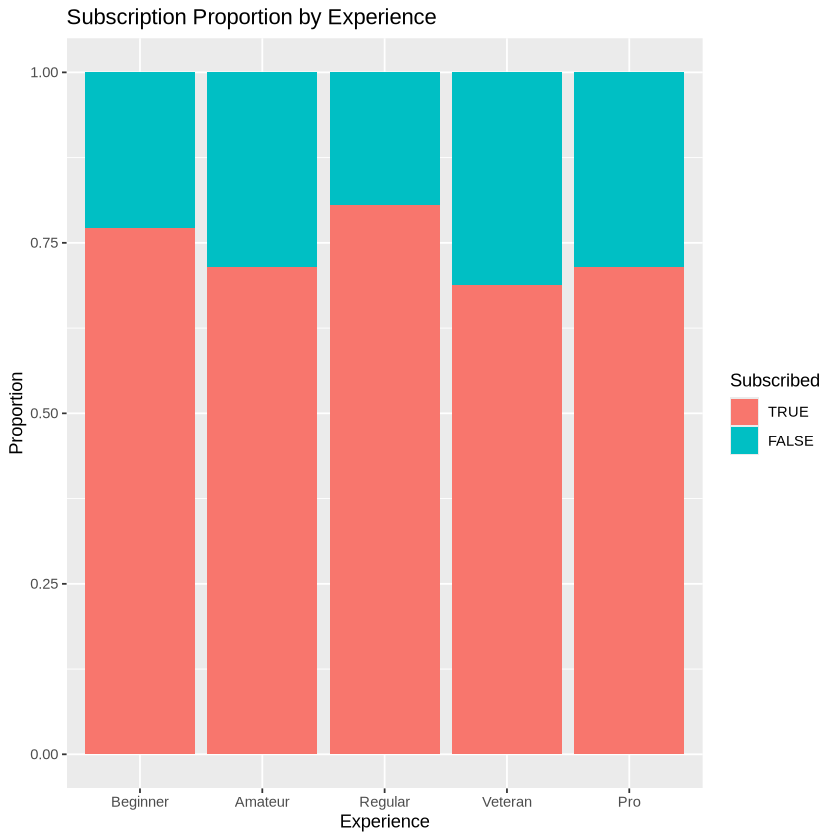

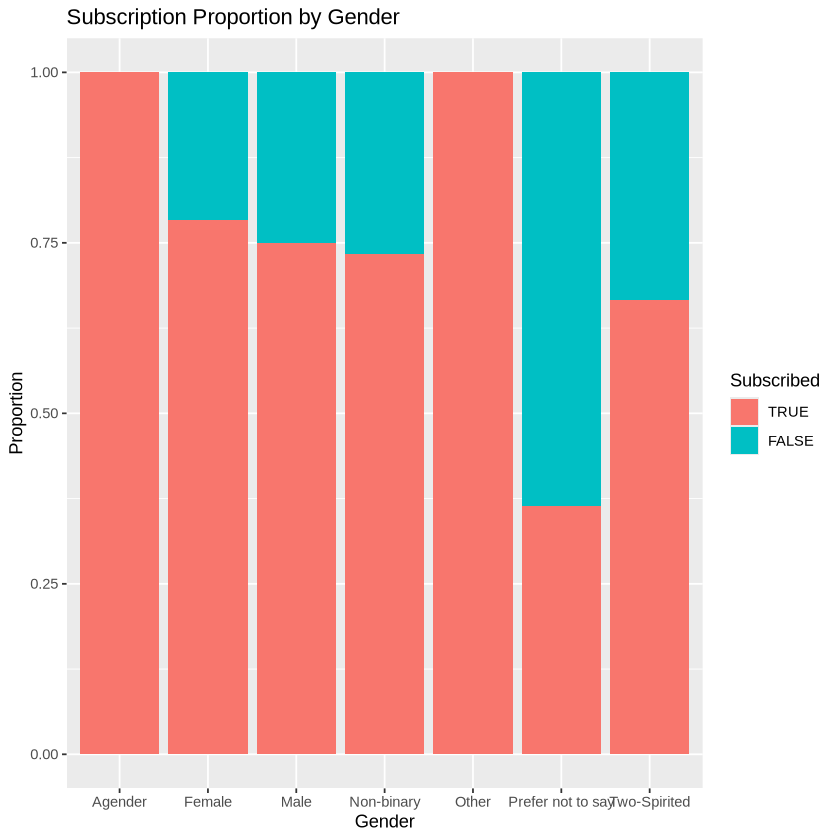

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


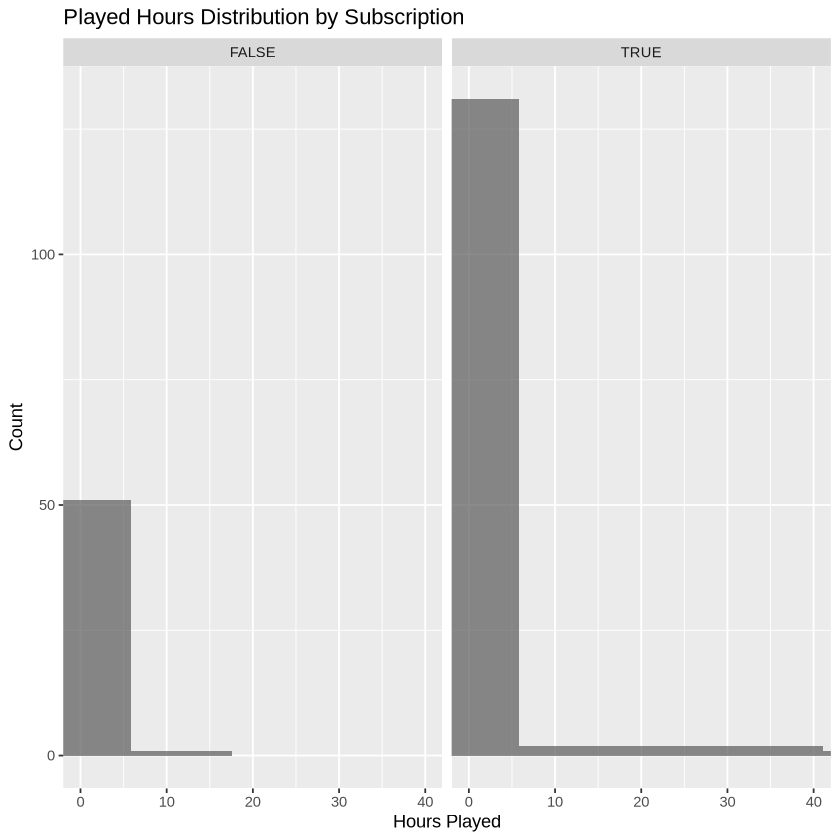

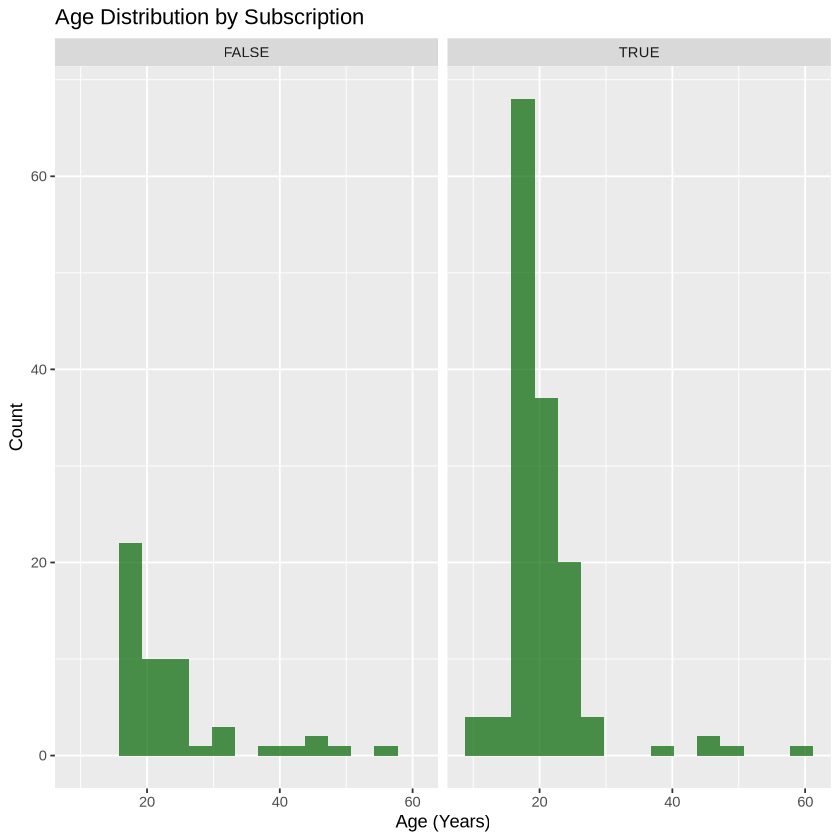

In [77]:
print("Mean Values for the Quantitative Variables")
mean_table

plot_exp <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Subscription Proportion by Experience", x = "Experience", y = "Proportion", fill = "Subscribed") +
    scale_x_discrete(limits = c("Beginner", "Amateur", "Regular", "Veteran", "Pro")) + 
    scale_fill_discrete(limits = c("TRUE", "FALSE"))
plot_exp

plot_gen <- players |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs(title = "Subscription Proportion by Gender", x = "Gender", y = "Proportion", fill = "Subscribed") + 
    scale_fill_discrete(limits = c("TRUE", "FALSE"))
plot_gen

plot_hours <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 20, alpha = 0.7) +
    facet_wrap(~ subscribe) +
    labs(title = "Played Hours Distribution by Subscription", x = "Hours Played", y = "Count") +
    coord_cartesian(xlim = c(0, 40))
plot_hours

plot_age <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram(bins = 15, fill = "darkgreen", alpha = 0.7) +
    facet_wrap(~ subscribe) + 
    labs(title = "Age Distribution by Subscription", x = "Age (Years)", y = "Count")
plot_age

# (4) Methods and Plan

# (5) GitHub Repository

[GitHub Link](https://github.com/charlenetam/individual_project_planning_stage)